# Creating Word Vectors with word2vec

In this notebook, we create word vectors from a corpus of public-domain books, a selection from [Project Gutenberg](https://www.gutenberg.org/).

#### Load dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [2]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
len(gutenberg.fileids())

18

#### Tokenize text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [8]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [9]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [10]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [12]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [13]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [14]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [15]:
gberg_sents[4][14]

'father'

In [16]:
# another convenient method that we don't immediately need: 
gutenberg.words() 

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [17]:
# gutenberg.words() is analogous to the following line, which need not be run: 
# word_tokenize(gutenberg.raw())

In [18]:
# our Gutenberg corpus is 2.6m words in length: 
len(gutenberg.words())

2621613

#### Run word2vec

In [19]:
# model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [20]:
# model.save('raw_gutenberg_model.w2v')

#### Explore model

In [21]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [22]:
model['dog']

array([ -5.60053289e-01,  -1.57095745e-01,  -1.35954544e-01,
         2.11573735e-01,  -1.07136287e-01,   8.77310261e-02,
         4.14559871e-01,   2.26700798e-01,   2.97906458e-01,
         5.01078293e-02,   1.78846210e-01,   1.08067788e-01,
        -4.35526311e-01,  -4.25833821e-01,  -2.53711820e-01,
         7.52079263e-02,  -5.83147258e-02,   3.74293029e-01,
        -6.66874468e-01,   2.33097542e-02,   1.35770917e-01,
         1.64983049e-01,  -1.20256573e-01,   4.77150202e-01,
         1.22489601e-01,   3.75590801e-01,   1.48467004e-01,
         2.42270246e-01,   3.16664786e-03,  -7.44531572e-01,
        -6.36309106e-03,   4.52868968e-01,   2.24508166e-01,
         2.70326473e-02,   1.53943673e-01,   2.01649368e-01,
        -1.73006937e-01,  -6.66332617e-02,   1.03040524e-01,
        -1.66178823e-01,   2.01654643e-01,   2.97852069e-01,
        -8.91307294e-02,  -3.24958622e-01,   8.13202839e-03,
         1.84750110e-02,  -1.02419108e-01,   1.29145041e-01,
         1.63626075e-01,

In [23]:
len(model['dog'])

64

In [24]:
model.most_similar('dog') # distance

[('puppy', 0.8146849870681763),
 ('sweeper', 0.7880833148956299),
 ('broth', 0.7820672988891602),
 ('cage', 0.7675053477287292),
 ('pig', 0.7646769285202026),
 ('pet', 0.7610172033309937),
 ('fox', 0.7553994059562683),
 ('Truck', 0.7543582320213318),
 ('Lightfoot', 0.742825984954834),
 ('cow', 0.7392480373382568)]

In [25]:
model.most_similar('think')

[('suppose', 0.8497018814086914),
 ('manage', 0.8408315181732178),
 ('know', 0.8337839841842651),
 ('contradict', 0.8264023661613464),
 ('interfere', 0.8262845277786255),
 ('NOW', 0.8262041211128235),
 ('Mamma', 0.8196532726287842),
 ('believe', 0.8150398135185242),
 ('shouldn', 0.8124459981918335),
 ('Williams', 0.8068450689315796)]

In [26]:
model.most_similar('day')

[('morning', 0.8098249435424805),
 ('night', 0.7679969072341919),
 ('month', 0.7410775423049927),
 ('evening', 0.7385483384132385),
 ('time', 0.7339625358581543),
 ('week', 0.7182490825653076),
 ('feasting', 0.7168370485305786),
 ('Saturday', 0.7018452286720276),
 ('Adar', 0.6979250311851501),
 ('morrow', 0.6971378922462463)]

In [27]:
model.most_similar('father')

[('mother', 0.8728880882263184),
 ('brother', 0.8333652019500732),
 ('sister', 0.7919358015060425),
 ('wife', 0.7858221530914307),
 ('daughter', 0.7800713181495667),
 ('Amnon', 0.7543610334396362),
 ('Tamar', 0.7502950429916382),
 ('servant', 0.7387294769287109),
 ('uncle', 0.7327381372451782),
 ('curseth', 0.7289719581604004)]

In [28]:
model.doesnt_match("mother father daughter dog".split())

'dog'

In [29]:
model.similarity('father', 'dog')

0.49294278479463099

In [30]:
# close, but not quite; distinctly in female direction: 
model.most_similar(positive=['father', 'woman'], negative=['man']) 

[('daughter', 0.7782288193702698),
 ('sister', 0.777533769607544),
 ('mother', 0.7643921971321106),
 ('wife', 0.7588695287704468),
 ('husband', 0.7556524276733398),
 ('Tamar', 0.7055943012237549),
 ('Rachel', 0.7008661031723022),
 ('conceived', 0.6945146322250366),
 ('Sarah', 0.6943398714065552),
 ('brother', 0.6798239946365356)]

In [31]:
# more confident about this one: 
model.most_similar(positive=['son', 'woman'], negative=['man']) 

[('daughter', 0.7534747123718262),
 ('Leah', 0.724845290184021),
 ('Hagar', 0.724432110786438),
 ('Rachel', 0.7239198684692383),
 ('conceived', 0.7235168218612671),
 ('Sarah', 0.7165275812149048),
 ('wife', 0.713229775428772),
 ('Rebekah', 0.6989840269088745),
 ('Caleb', 0.6943678259849548),
 ('Sarai', 0.6914916038513184)]

In [32]:
model.most_similar(positive=['husband', 'woman'], negative=['man']) 

[('wife', 0.708131730556488),
 ('sister', 0.6937975287437439),
 ('daughter', 0.68210768699646),
 ('child', 0.66499924659729),
 ('maid', 0.663989782333374),
 ('conceived', 0.6550735235214233),
 ('mother', 0.6408793926239014),
 ('nurse', 0.6267993450164795),
 ('elder', 0.6201719045639038),
 ('widow', 0.6188254952430725)]

In [33]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30) 

[('Rachel', 0.7381176352500916),
 ('Sarah', 0.7235167026519775),
 ('Laban', 0.7040327191352844),
 ('Leah', 0.703708291053772),
 ('Padanaram', 0.7029510736465454),
 ('Hagar', 0.6949448585510254),
 ('Rebekah', 0.6927774548530579),
 ('Pharaoh', 0.6861628293991089),
 ('Abram', 0.6841262578964233),
 ('Hamor', 0.6762512922286987),
 ('Shechem', 0.6723358631134033),
 ('daughter', 0.6721547842025757),
 ('damsel', 0.6675446033477783),
 ('Abimelech', 0.6638238430023193),
 ('Ephron', 0.6627167463302612),
 ('Bethuel', 0.6601616144180298),
 ('Esau', 0.6585861444473267),
 ('Solomon', 0.6583372354507446),
 ('Bilhah', 0.6578104496002197),
 ('household', 0.6573641300201416),
 ('Jerubbaal', 0.655084490776062),
 ('conceived', 0.6541304588317871),
 ('Judah', 0.652094304561615),
 ('Sarai', 0.649071991443634),
 ('Lot', 0.6466783881187439),
 ('Zilpah', 0.6465750932693481),
 ('birthright', 0.6449142694473267),
 ('queen', 0.644464910030365),
 ('David', 0.6373385190963745),
 ('Rahab', 0.6370617151260376)]

In [34]:
# impressive for such a small data set, without any cleaning, e.g., to lower case (covered next)

#### Reduce word vector dimensionality with t-SNE

In [35]:
model.wv.vocab

{'[': <gensim.models.keyedvectors.Vocab at 0x7fbfce6410f0>,
 'Emma': <gensim.models.keyedvectors.Vocab at 0x7fbfce655da0>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fbfce655b70>,
 'Jane': <gensim.models.keyedvectors.Vocab at 0x7fbfce655a20>,
 ']': <gensim.models.keyedvectors.Vocab at 0x7fbfce655518>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7fbfce655550>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7fbfce6558d0>,
 'Woodhouse': <gensim.models.keyedvectors.Vocab at 0x7fbfce655f28>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7fbfce655f98>,
 'handsome': <gensim.models.keyedvectors.Vocab at 0x7fbfce655dd8>,
 'clever': <gensim.models.keyedvectors.Vocab at 0x7fbfce655e80>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7fbfce655978>,
 'rich': <gensim.models.keyedvectors.Vocab at 0x7fbfce655ef0>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fbfce6559b0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fbfce655c88>,
 'comfortable': <gensim.models.keyedvectors.Vocab at 0x7fbf

In [36]:
len(model.wv.vocab)

17011

In [37]:
X = model[model.wv.vocab]

In [38]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [39]:
X_2d = tsne.fit_transform(X)

In [40]:
X_2d[0:5]

array([[ 3.93104606, -3.94591487],
       [ 3.72858522, -3.21834929],
       [ 3.11308347, -3.13188365],
       [ 5.1765412 ,  2.32805661],
       [ 3.92752917, -3.95470727]])

In [41]:
# create DataFrame for storing results and plotting
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [42]:
coords_df.head()

,x,y,token
0,3.931046,-3.945915,[
1,3.728585,-3.218349,Emma
2,3.113083,-3.131884,by
3,5.176541,2.328057,Jane
4,3.927529,-3.954707,]


In [43]:
# coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [44]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

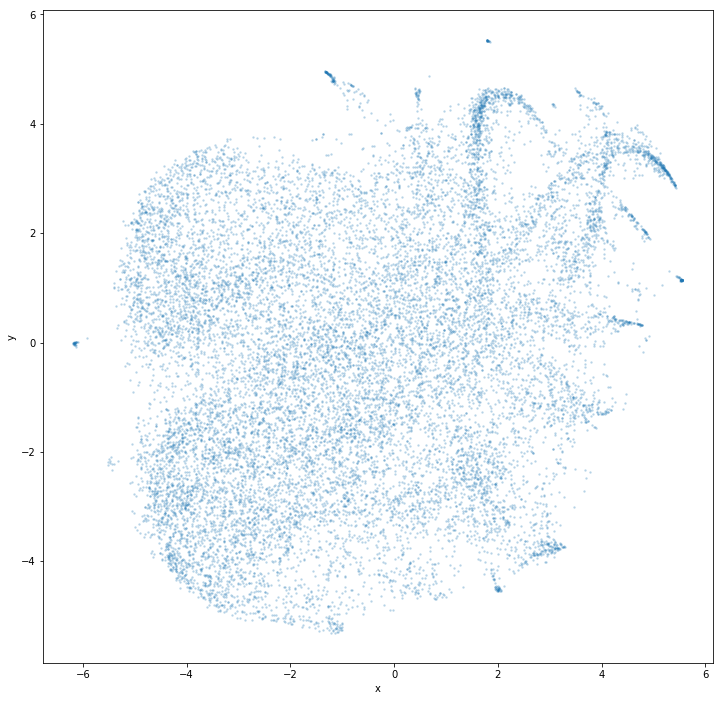

In [45]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [46]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

In [47]:
subset_df = coords_df.sample(n=5000)

In [48]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [49]:
show(p)